In [13]:
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

# 简单的黑白边界检测

In [14]:
# 创建输入图片，图片左边的像素点取值1，右边的像素点取值0
img = np.ones([50, 50], dtype='float32')
img[:, 30:] = 0.

# 将图片形状调整为[N, C, H, W]的形式
x = img.reshape([1, 1, 50, 50])

# 将ndarray转换为tensor
x = paddle.to_tensor(x)

x

Tensor(shape=[1, 1, 50, 50], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[[1., 1., 1., ..., 0., 0., 0.],
          [1., 1., 1., ..., 0., 0., 0.],
          [1., 1., 1., ..., 0., 0., 0.],
          ...,
          [1., 1., 1., ..., 0., 0., 0.],
          [1., 1., 1., ..., 0., 0., 0.],
          [1., 1., 1., ..., 0., 0., 0.]]]])

In [15]:
# 初始化卷积核权重参数
w = np.array([1, 0, -1], dtype='float32')

# 将权重参数调整为[cout, cin, kh, kw]格式的四维张量
w = w.reshape([1, 1, 1, 3])

# 创建卷积算子，设置输入输出通道数、卷积核大小，并初始化权重参数
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[1, 3],
             weight_attr=paddle.ParamAttr(initializer=Assign(value=w)))

conv

Conv2D(1, 1, kernel_size=[1, 3], data_format=NCHW)

In [16]:
# 将卷积算子作用在输入图片上
y = conv(x)

# 将输出tensor转换为ndarray
out = y.numpy()

out

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]], dtype=float32)

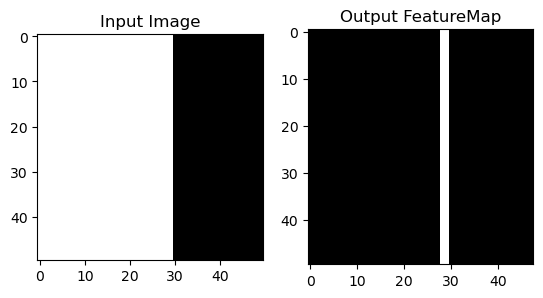

In [17]:
f1 = plt.subplot(121)
f1.set_title('Input Image')
plt.imshow(img, cmap='gray')

f2 = plt.subplot(122)
f2.set_title('Output FeatureMap')
# 卷积算子输出数据形状为[N, C, H, W]4维数组形式
# plt.imshow画灰度图时，只接受2维数组
# 通过numpy.squeeze函数将大小为1的维度消除
plt.imshow(out.squeeze(), cmap='gray')

plt.show()

# 图像中物体边缘检测

In [22]:
# 读入图片
img = Image.open('../Datasets/flower.png')

# 将读入的图片转化为float32类型的ndarray
# 形状是[H, W, 3]
x = np.array(img).astype('float32')

# 将通道这一维度调整到最前面
x = np.transpose(x, (2, 0, 1))

# 将数据形状转化为[N, C, H, W]格式
x = x.reshape(1, 3, img.height, img.width)

# 转化为Tensor格式
x = paddle.to_tensor(x)

x

Tensor(shape=[1, 3, 500, 667], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[[20. , 18. , 14. , ..., 8.  , 8.  , 8.  ],
          [24. , 21. , 18. , ..., 5.  , 5.  , 5.  ],
          [21. , 19. , 18. , ..., 6.  , 6.  , 6.  ],
          ...,
          [77. , 53. , 49. , ..., 60. , 60. , 60. ],
          [71. , 47. , 45. , ..., 58. , 58. , 58. ],
          [89. , 64. , 61. , ..., 60. , 60. , 60. ]],

         [[60. , 57. , 53. , ..., 21. , 21. , 21. ],
          [63. , 60. , 57. , ..., 18. , 18. , 18. ],
          [58. , 56. , 55. , ..., 19. , 19. , 19. ],
          ...,
          [99. , 75. , 71. , ..., 88. , 88. , 88. ],
          [93. , 69. , 67. , ..., 86. , 86. , 86. ],
          [111., 86. , 83. , ..., 88. , 88. , 88. ]],

         [[7.  , 4.  , 0.  , ..., 11. , 11. , 11. ],
          [10. , 7.  , 4.  , ..., 8.  , 8.  , 8.  ],
          [7.  , 5.  , 4.  , ..., 9.  , 9.  , 9.  ],
          ...,
          [24. , 0.  , 0.  , ..., 47. , 48. , 48. ],
          [18. , 0.

In [25]:
# 设置卷积核权重参数
w = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype='float32')/8
w = w.reshape([1, 1, 3, 3])

# 由于输入通道数是3，将卷积核的形状从[1,1,3,3]调整为[1,3,3,3]
w = np.repeat(w, 3, axis=1)

# 创建卷积算子，输出通道数为1，卷积核大小为[3, 3]
conv = Conv2D(in_channels=3, out_channels=1, kernel_size=[3, 3], 
             weight_attr=paddle.ParamAttr(initializer=Assign(value=w)))

conv

Conv2D(3, 1, kernel_size=[3, 3], data_format=NCHW)

In [26]:
y = conv(x)
out = y.numpy()

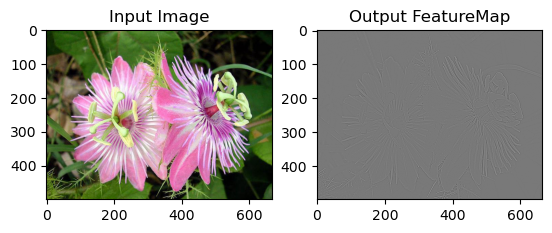

In [30]:
f1 = plt.subplot(121)
f1.set_title('Input Image')
plt.imshow(img)

f2 = plt.subplot(122)
f2.set_title('Output FeatureMap')
plt.imshow(out.squeeze(), cmap='gray')

plt.show()

# 图像均值模糊

In [32]:
# 读入图像，并转换为灰度图
img = Image.open('../Datasets/flower.png').convert('L')

img = np.array(img).astype('float32')

x = img.reshape(1, 1, img.shape[0], img.shape[1])

x = paddle.to_tensor(x)

In [34]:
# 初始化卷积权重参数
w = np.ones([1, 1, 5, 5], dtype='float32')/25
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[5, 5], 
             weight_attr=paddle.ParamAttr(initializer=Assign(value=w)))

In [35]:
y = conv(x)
out = y.numpy()

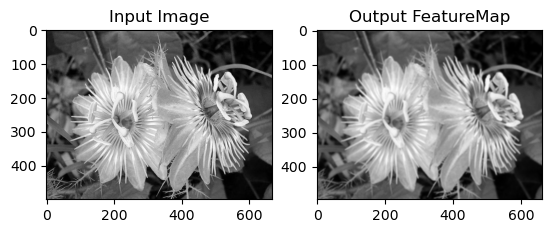

In [36]:
f1 = plt.subplot(121)
f1.set_title('Input Image')
plt.imshow(img, cmap='gray')

f2 = plt.subplot(122)
f2.set_title('Output FeatureMap')
plt.imshow(out.squeeze(), cmap='gray')

plt.show()